<a href="https://colab.research.google.com/github/nMan007/Data-Science/blob/main/CHENNAI_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [4]:
df=pd.read_csv("train-chennai-sale.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [5]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [6]:
df.shape

(7109, 22)

In [7]:
df['N_BEDROOM']=df['N_BEDROOM'].fillna(df['N_BEDROOM'].mean())
df['N_BATHROOM']=df['N_BATHROOM'].fillna(df['N_BATHROOM'].mean())
df['QS_OVERALL']=df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean())

In [8]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [9]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802845,0.409495,1.019099,0.891972,0.897834,0.887266,0.525440,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.503254,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.880000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


Cleaning of Dataset

In [10]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [11]:
df.replace("Karapakam","Karapakkam",inplace = True)
df.replace("Ana Nagar","Anna Nagar",inplace = True)
df.replace("Ann Nagar","Anna Nagar",inplace = True)
df.replace("KKNagar","KK Nagar",inplace = True)
df.replace("Adyr","Adyar",inplace = True)
df.replace("Chormpet","Chrompet",inplace = True)
df.replace("Chrompt","Chrompet",inplace = True)
df.replace("Chrmpet","Chrompet",inplace = True)
df.replace("TNagar","T Nagar",inplace = True)
df.replace("Velchery","Velachery",inplace = True)
df.replace("Velacheryr","Velachery",inplace = True)

In [12]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

Parking Facility

In [13]:
df.PARK_FACIL.replace("NOO","NO",inplace = True)

Street

In [14]:
df.STREET.unique()
df.STREET.replace("Pavd","Paved",inplace= True)
df.STREET.replace("NoAccess","No Access",inplace = True)
print(df.STREET.value_counts())

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64


DIST_MAINROAD

In [15]:
df.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


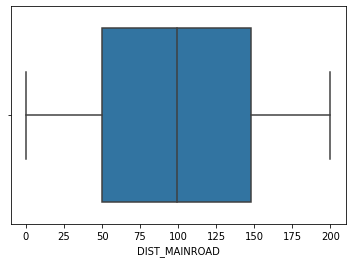

In [16]:
sns.boxplot(df.DIST_MAINROAD);
#checking the outliers using the boxplot

N_BEDROOM

In [17]:
df.N_BEDROOM.value_counts()

1.000000    3795
2.000000    2352
3.000000     707
4.000000     254
1.637029       1
Name: N_BEDROOM, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


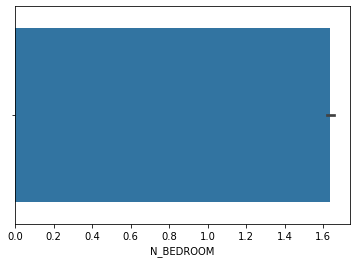

In [18]:
sns.barplot(df.N_BEDROOM);
#N_BEDROOM has outliers but 4 bedroom house are also there in chennai so we didnt consider this as a outlier

In [19]:
k = df["N_BEDROOM"]>= 4
k.sum()

254

Build date and sale date

In [20]:
df.DATE_BUILD = pd.to_datetime(df["DATE_BUILD"])
df.DATE_SALE = pd.to_datetime(df["DATE_SALE"])
df['YEARSALE'] = pd.DatetimeIndex(df['DATE_SALE']).year
df['YEARBUILD'] = pd.DatetimeIndex(df['DATE_BUILD']).year
df['DATE_BUILD'].dtype

dtype('<M8[ns]')

In [21]:
df.drop(["DATE_SALE","DATE_BUILD"],axis = 1)

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,YEARSALE,YEARBUILD
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,...,A,4.0,3.9,4.9,4.330,380000,144400,7600000,2011,1967
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,...,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,2006,1995
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,...,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,2012,1992
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,...,I,4.7,3.9,3.6,4.010,356321,77042,9630290,2010,1988
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,...,C,3.0,2.5,4.1,3.290,237000,74063,7406250,2009,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,...,RM,3.0,2.2,2.4,2.520,208767,107060,5353000,2011,1962
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,...,RH,3.6,4.5,3.3,3.920,346191,205551,10818480,2004,1995
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,...,I,4.3,4.2,2.9,3.840,317354,167028,8351410,2006,1978
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,...,RL,4.6,3.8,4.1,4.160,425350,119098,8507000,2009,1977


In [22]:
#Below formula is used to calculate the inflation of salesprice, by using this formula to calculate the adjusted price of chennai. FV = PV(1+r)^n
#Where FV is the future value
#PV is the present value
#r is the expected rate of return per annum
#n is the tenure

In [23]:
#sales price of house is adjusted to inflation 
for i,j in df.iterrows():
  m =(df["SALES_PRICE"])*(1.05)**(2022-df["YEARSALE"])
print(m)

0       1.299858e+07
1       4.740717e+07
2       2.143495e+07
3       1.729462e+07
4       1.396559e+07
            ...     
7104    9.155447e+06
7105    2.603596e+07
7106    1.823008e+07
7107    1.604122e+07
7108    2.286627e+07
Length: 7109, dtype: float64


In [24]:
df["Adjusted_price"] = m
df.drop(columns=["SALES_PRICE","DATE_BUILD","DATE_SALE"])

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,YEARSALE,YEARBUILD,Adjusted_price
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,...,A,4.0,3.9,4.9,4.330,380000,144400,2011,1967,1.299858e+07
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,...,RH,4.9,4.2,2.5,3.765,760122,304049,2006,1995,4.740717e+07
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,...,RL,4.1,3.8,2.2,3.090,421094,92114,2012,1992,2.143495e+07
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,...,I,4.7,3.9,3.6,4.010,356321,77042,2010,1988,1.729462e+07
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,...,C,3.0,2.5,4.1,3.290,237000,74063,2009,1979,1.396559e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,...,RM,3.0,2.2,2.4,2.520,208767,107060,2011,1962,9.155447e+06
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,...,RH,3.6,4.5,3.3,3.920,346191,205551,2004,1995,2.603596e+07
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,...,I,4.3,4.2,2.9,3.840,317354,167028,2006,1978,1.823008e+07
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,...,RL,4.6,3.8,4.1,4.160,425350,119098,2009,1977,1.604122e+07


INT_SQFT

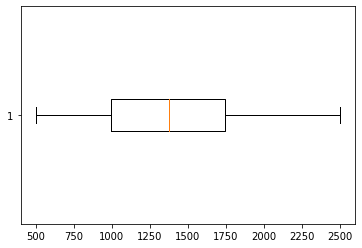

In [25]:
plt.boxplot(df.INT_SQFT,vert = 0);

In [26]:
df.INT_SQFT.isnull().value_counts()
df.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

SALE_COND

In [27]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [28]:
df.SALE_COND.replace("Ab Normal","AbNormal",inplace = True)
df.SALE_COND.replace("Partiall'","Partial",inplace = True)
df.SALE_COND.replace("PartiaLl","Partial",inplace = True)
df.SALE_COND.replace("Adj Land","AdjLand",inplace = True)
df.SALE_COND.unique()
df.SALE_COND.value_counts()

AdjLand        1439
Partial        1430
Normal Sale    1423
AbNormal       1411
Family         1403
Partiall          3
Name: SALE_COND, dtype: int64

BUILDTYPE

In [29]:
df.BUILDTYPE.replace("Comercial","Commercial",inplace = True)
df.BUILDTYPE.replace("Other","Others",inplace = True)
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

UTILITY_AVAIL

In [30]:
df.UTILITY_AVAIL.replace("All Pub","AllPub",inplace = True)
df.UTILITY_AVAIL.unique()
df.UTILITY_AVAIL.value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

MZZONE

In [31]:
df.MZZONE.unique()
df.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

QS_OVERALL

In [32]:
df.QS_OVERALL.isnull().sum()

0

Filling the null values with mean values

In [33]:
df = df.fillna({"N_BATHROOM":df["N_BATHROOM"].mean(),"N_BEDROOM":df["N_BEDROOM"].mean(),'QS_OVERALL':df['QS_OVERALL'].mean()})
df['QS_OVERALL'] = df['QS_OVERALL'].astype(int)
df['QS_ROOMS'] = df['QS_ROOMS'].astype(int)
df['QS_BATHROOM'] = df['QS_BATHROOM'].astype(int)
df['QS_BEDROOM'] = df['QS_BEDROOM'].astype(int)
df['N_BATHROOM'] = df['N_BATHROOM'].astype(int)
df['N_BEDROOM'] = df['N_BEDROOM'].astype(int)

df.dtypes


PRT_ID                    object
AREA                      object
INT_SQFT                   int64
DATE_SALE         datetime64[ns]
DIST_MAINROAD              int64
N_BEDROOM                  int64
N_BATHROOM                 int64
N_ROOM                     int64
SALE_COND                 object
PARK_FACIL                object
DATE_BUILD        datetime64[ns]
BUILDTYPE                 object
UTILITY_AVAIL             object
STREET                    object
MZZONE                    object
QS_ROOMS                   int64
QS_BATHROOM                int64
QS_BEDROOM                 int64
QS_OVERALL                 int64
REG_FEE                    int64
COMMIS                     int64
SALES_PRICE                int64
YEARSALE                   int64
YEARBUILD                  int64
Adjusted_price           float64
dtype: object

In [34]:
pip install sweetviz

     |████████████████████████████████| 15.1 MB 6.8 MB/s 


Data Visualisation

In [35]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html("./SWEETVIZ_REPORT")

                                             |          | [  0%]   00:00 -> (? left)

Report ./SWEETVIZ_REPORT was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [36]:
import IPython
IPython.display.HTML('SWEETVIZ_REPORT.html')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


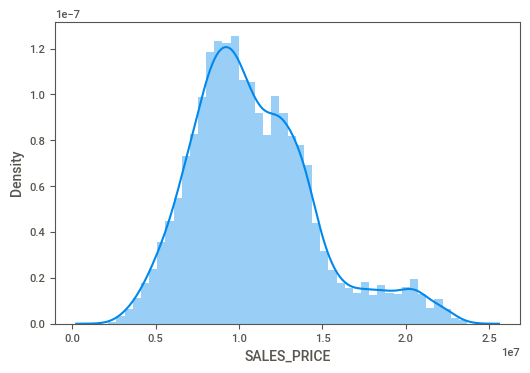

In [37]:
sns.distplot(df['SALES_PRICE'],kde=True);

In [38]:
df["Adjusted_price"] = df["Adjusted_price"].astype(int)
df["Adjusted_price"].dtypes

dtype('int64')

In [39]:
df.Adjusted_price

0       12998579
1       47407168
2       21434950
3       17294617
4       13965588
          ...   
7104     9155446
7105    26035962
7106    18230080
7107    16041217
7108    22866274
Name: Adjusted_price, Length: 7109, dtype: int64

In [40]:
np.seterr(under='ignore')

{'divide': 'raise', 'invalid': 'raise', 'over': 'raise', 'under': 'raise'}

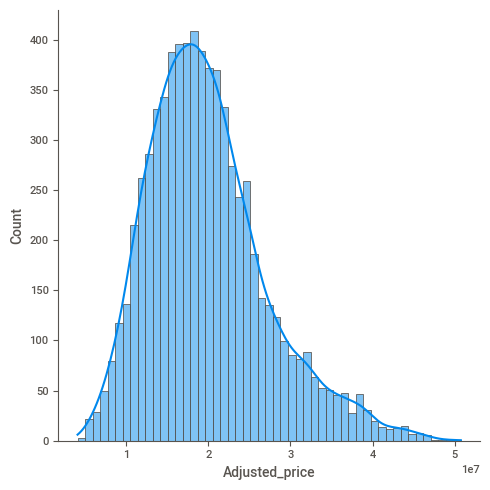

In [41]:
sns.displot(df['Adjusted_price'],kde = True);

In [42]:
df["Adjusted_price"] = df["Adjusted_price"].astype(int)
df["Adjusted_price"].dtypes

dtype('int64')

In [43]:
df.Adjusted_price

0       12998579
1       47407168
2       21434950
3       17294617
4       13965588
          ...   
7104     9155446
7105    26035962
7106    18230080
7107    16041217
7108    22866274
Name: Adjusted_price, Length: 7109, dtype: int64

In [44]:
np.seterr(under='ignore')

{'divide': 'raise', 'invalid': 'raise', 'over': 'raise', 'under': 'ignore'}

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


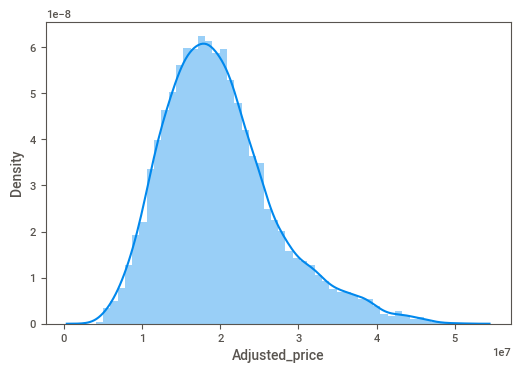

In [45]:
sns.distplot(df['Adjusted_price'],kde = True);

Correlation matrix

                INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM    N_ROOM  \
INT_SQFT        1.000000       0.002022   0.786263    0.515290  0.951279   
DIST_MAINROAD   0.002022       1.000000  -0.002723    0.001850  0.002301   
N_BEDROOM       0.786263      -0.002723   1.000000    0.755207  0.840209   
N_BATHROOM      0.515290       0.001850   0.755207    1.000000  0.568541   
N_ROOM          0.951279       0.002301   0.840209    0.568541  1.000000   
QS_ROOMS        0.016146       0.013050   0.011434    0.010452  0.013468   
QS_BATHROOM    -0.011463      -0.021857  -0.008603   -0.011005 -0.009066   
QS_BEDROOM      0.005847       0.002757   0.014449    0.013390  0.012072   
QS_OVERALL      0.005862      -0.014337   0.008314    0.002951  0.008002   
REG_FEE         0.657544       0.011600   0.455380    0.260244  0.630932   
COMMIS          0.571076       0.010994   0.430446    0.256726  0.533343   
SALES_PRICE     0.612125       0.018783   0.330987    0.108834  0.602760   
YEARSALE    

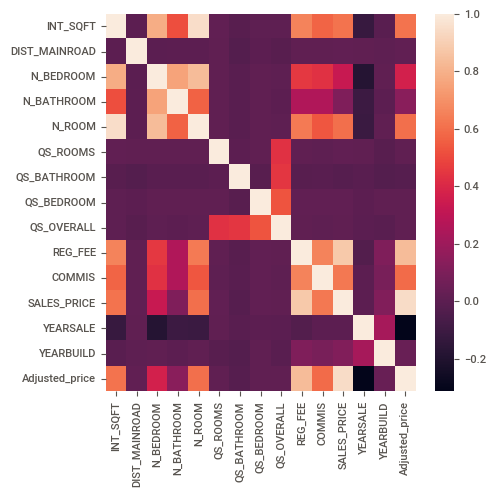

In [46]:
correlation = df.corr()
print(correlation)
x,y = plt.subplots(figsize = (5,5))
sns.heatmap(correlation);


In [47]:
correlation['Adjusted_price']

INT_SQFT          0.612943
DIST_MAINROAD     0.015286
N_BEDROOM         0.371046
N_BATHROOM        0.138669
N_ROOM            0.600436
QS_ROOMS          0.012307
QS_BATHROOM      -0.018327
QS_BEDROOM        0.012141
QS_OVERALL        0.010671
REG_FEE           0.838309
COMMIS            0.591453
SALES_PRICE       0.944133
YEARSALE         -0.313831
YEARBUILD         0.037996
Adjusted_price    1.000000
Name: Adjusted_price, dtype: float64

In [48]:
build_sale_duration = df["YEARSALE"].subtract(df["YEARBUILD"])
df["building_Age"] = build_sale_duration

df.drop(["DATE_SALE"],axis=1)
df.drop(["DATE_BUILD"],axis=1)
df.head(5)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,YEARSALE,YEARBUILD,Adjusted_price,building_Age
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,...,3,4,4,380000,144400,7600000,2011,1967,12998579,44
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,4,2,3,760122,304049,21717770,2006,1995,47407168,11
2,P01812,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,...,3,2,3,421094,92114,13159200,2012,1992,21434950,20
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,...,3,3,4,356321,77042,9630290,2010,1988,17294617,22
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,...,2,4,3,237000,74063,7406250,2009,1979,13965588,30


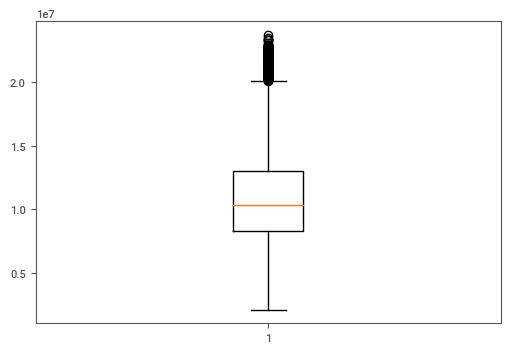

In [49]:
plt.boxplot(df['SALES_PRICE']);
#Sales price has some outliers but this not taken into consideration because the more no. of rooms the value of home 

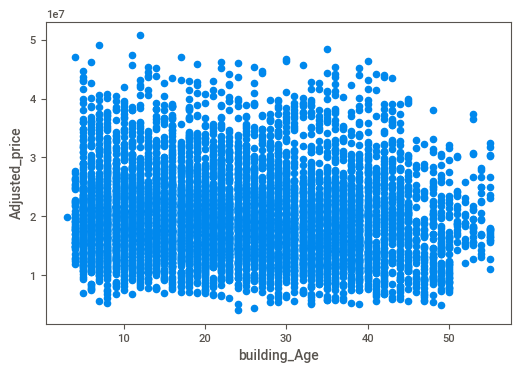

In [50]:
df.plot.scatter(x='building_Age',y='Adjusted_price')
#This graph shows the clear linear pattern btw the building age and adjustedprice

In [51]:
DF = [i for i in df.columns if df[i].dtypes == 'O']
DF

['PRT_ID',
 'AREA',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

In [52]:
dis_variable =[variable for variable in df if variable not in ["PRT_ID"] ]
target_variable = df["Adjusted_price"]

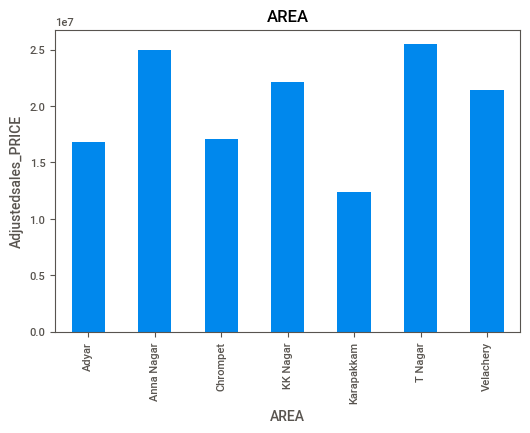

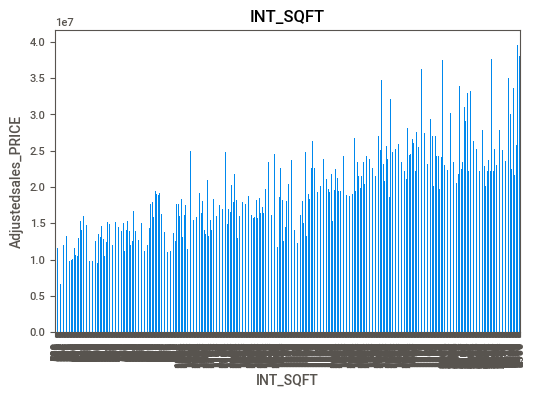

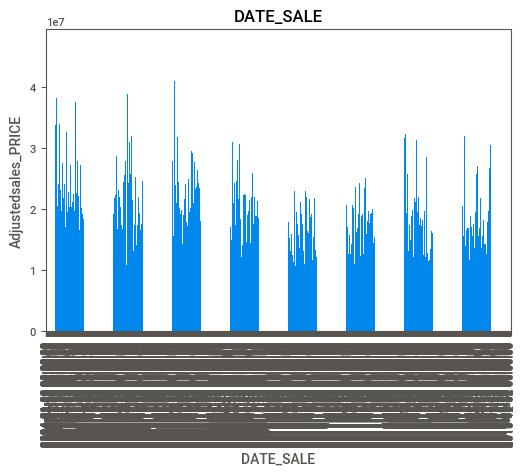

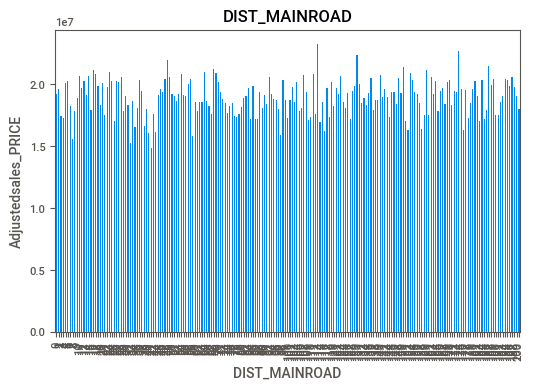

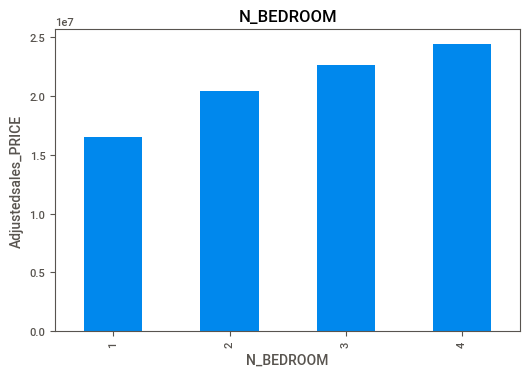

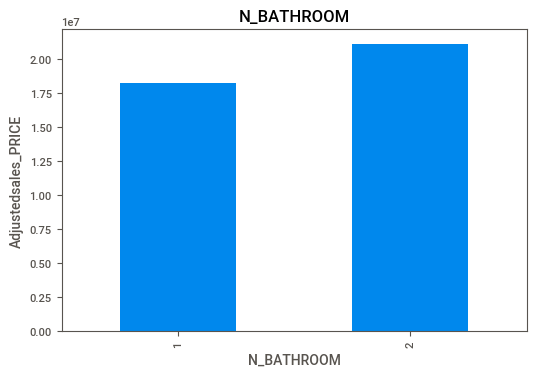

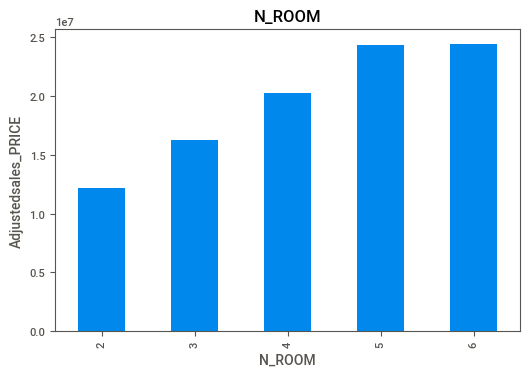

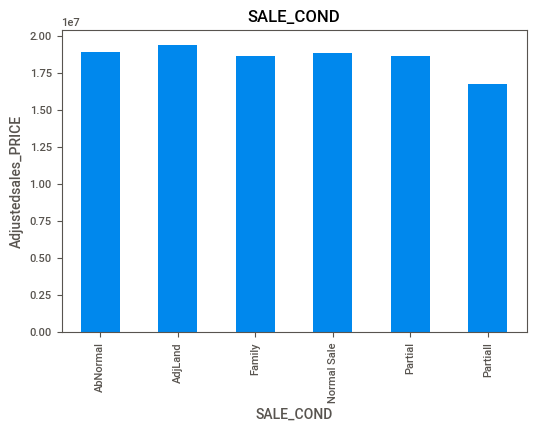

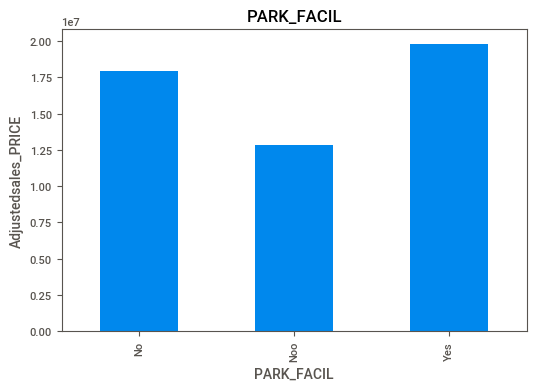

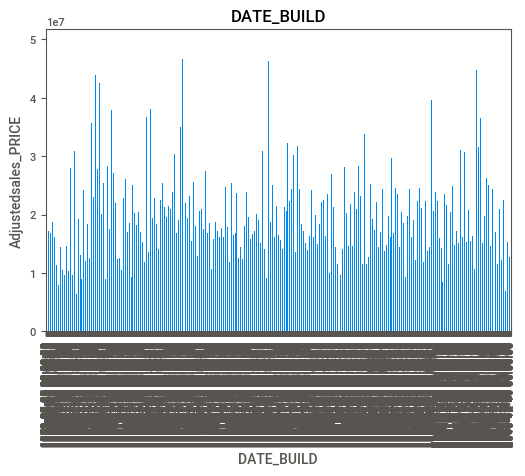

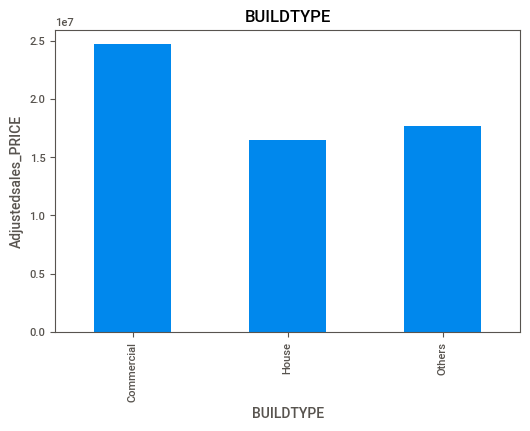

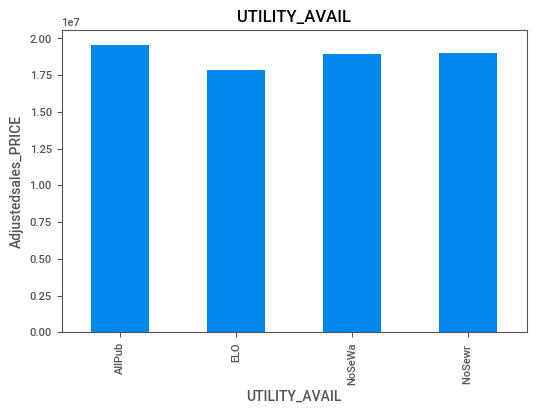

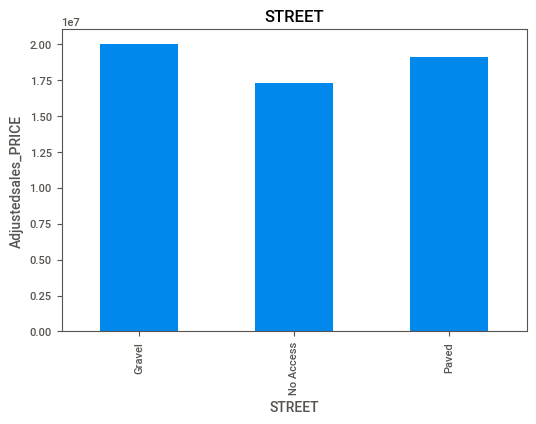

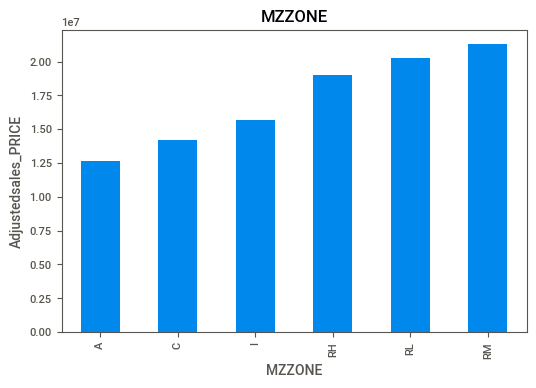

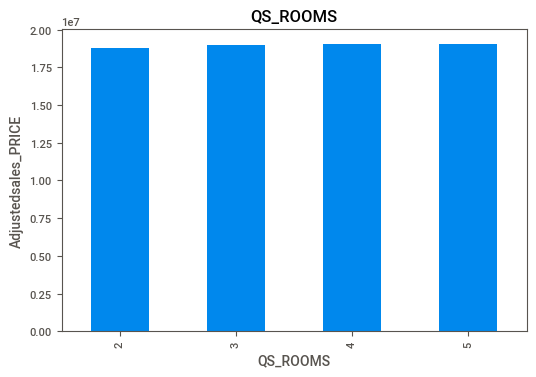

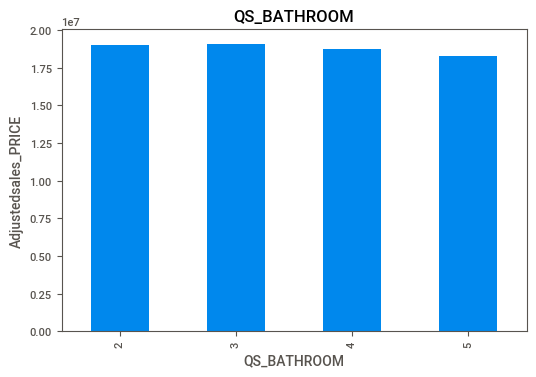

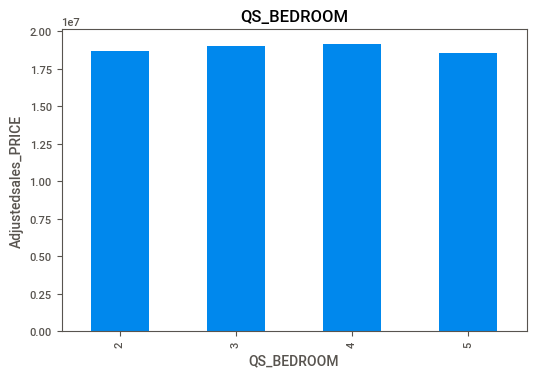

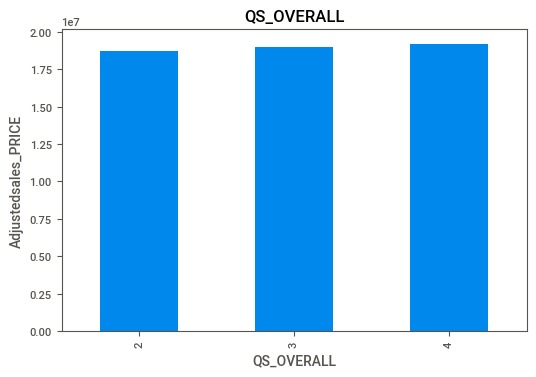

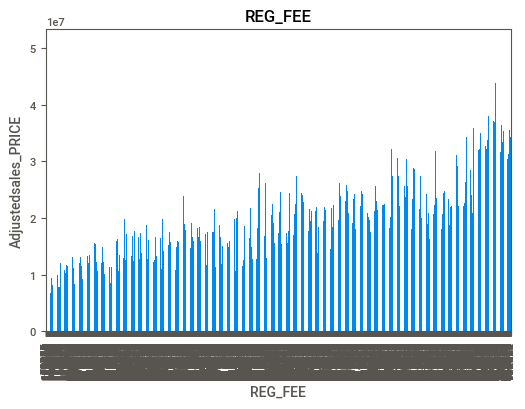

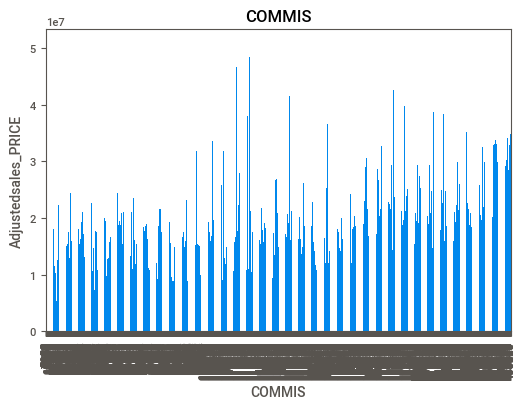

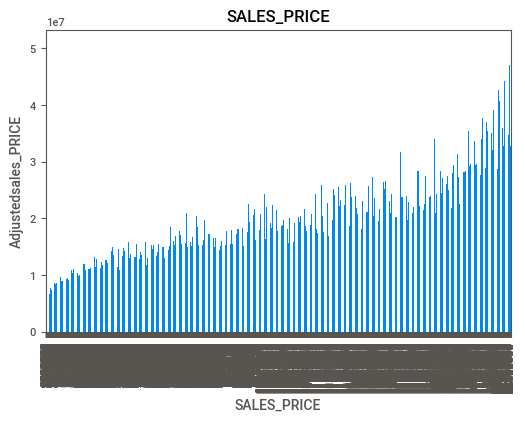

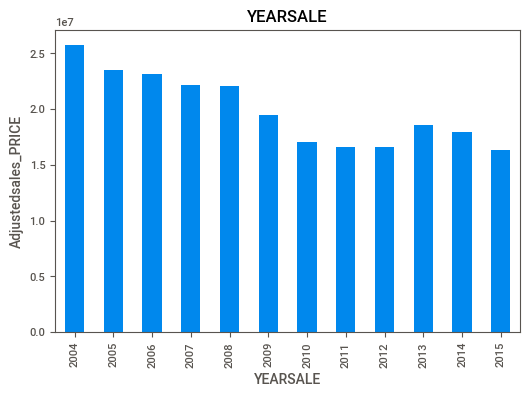

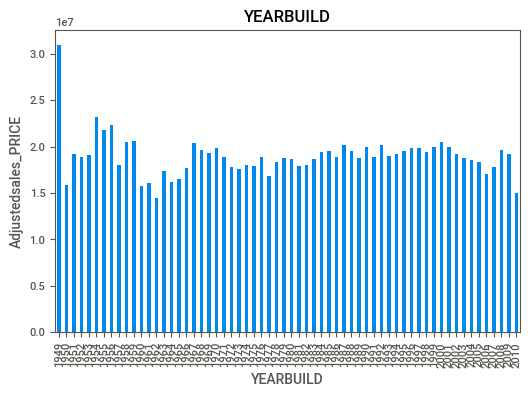

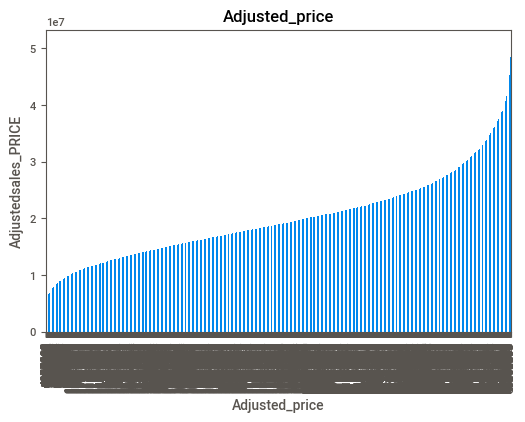

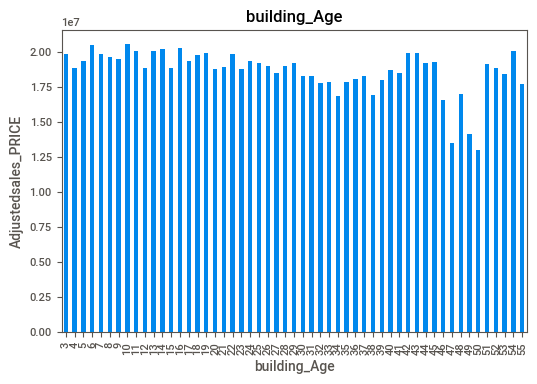

In [85]:
for feature in dis_variable:
  df1 = df.copy()
  df1.groupby(feature)['Adjusted_price'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('Adjustedsales_PRICE')
  plt.title(feature)
  plt.show()

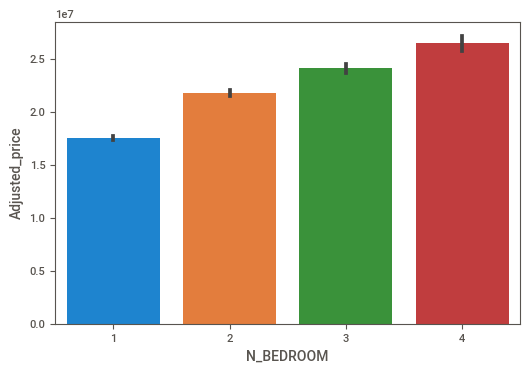

In [90]:
sns.barplot(x="N_BEDROOM",y = "Adjusted_price",data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


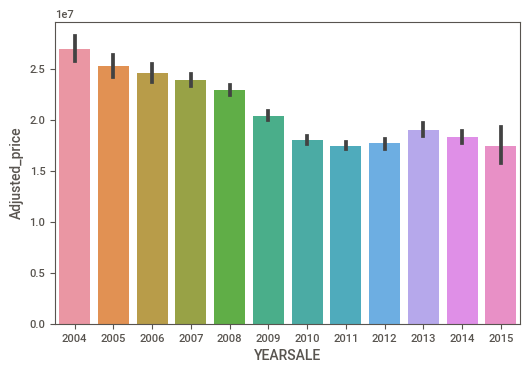

In [56]:
sns.barplot(df["YEARSALE"],y=df["Adjusted_price"])

In this graph we can clearly see the more building age more the salesprice.

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 8 Text major ticklabel objects>)

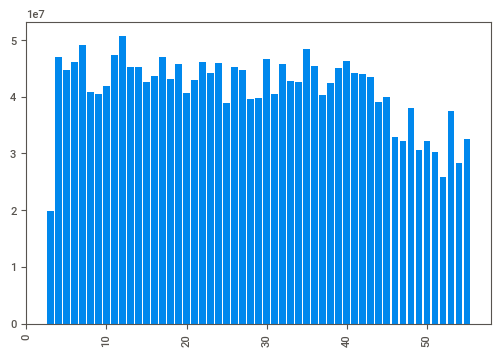

In [57]:
plt.bar(df.building_Age,df.Adjusted_price)
plt.xticks(rotation = 90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


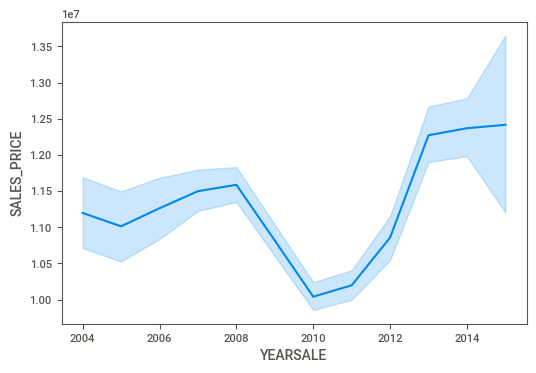

In [58]:
sns.lineplot(df["YEARSALE"],df["SALES_PRICE"])
#In 2010 the sales price of the house has been decreased

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


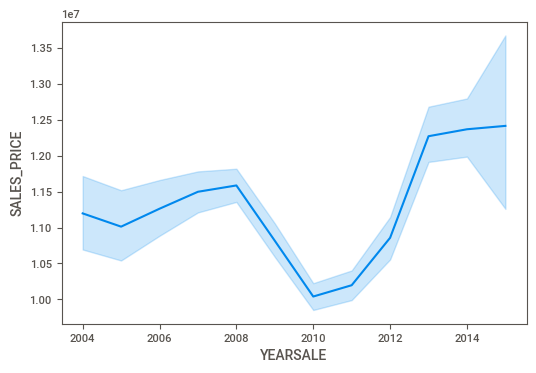

In [59]:
sns.lineplot(df["YEARSALE"],df["SALES_PRICE"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


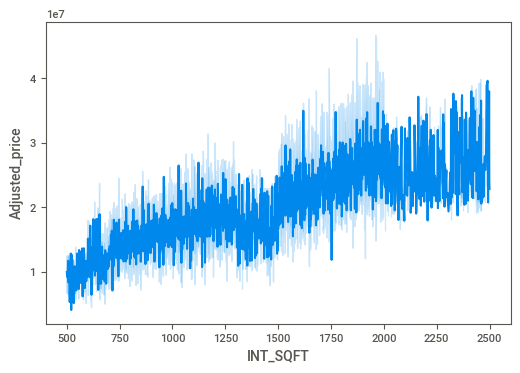

In [60]:
sns.lineplot(df.INT_SQFT,df.Adjusted_price)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


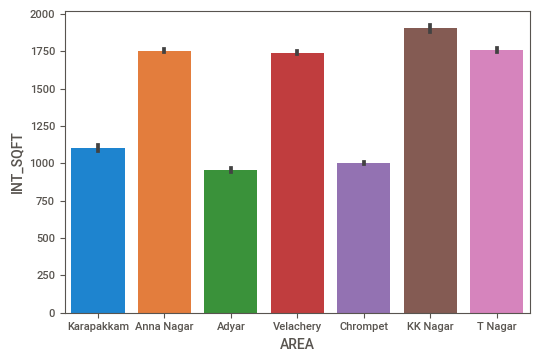

In [61]:
sns.barplot(df.AREA,df.INT_SQFT)

In [62]:
df["sqt_rate"] = df["SALES_PRICE"]/df["INT_SQFT"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


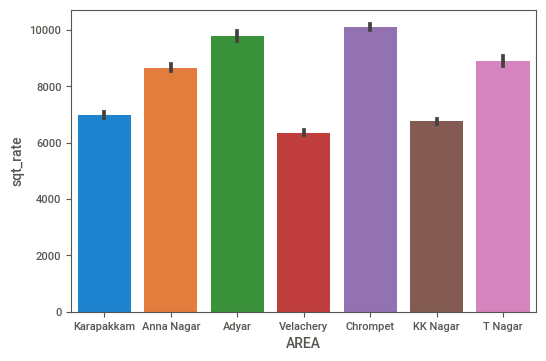

In [63]:
sns.barplot(df.AREA,df.sqt_rate)

One hot encoding

In [64]:
category = df.drop(columns = ["PRT_ID","YEARSALE","YEARBUILD","building_Age","DATE_SALE","DATE_BUILD"],axis =1)
category.dtypes

data = pd.get_dummies(category)
print(data.columns)
data

Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE',
       'COMMIS', 'SALES_PRICE', 'Adjusted_price', 'sqt_rate', 'AREA_Adyar',
       'AREA_Anna Nagar', 'AREA_Chrompet', 'AREA_KK Nagar', 'AREA_Karapakkam',
       'AREA_T Nagar', 'AREA_Velachery', 'SALE_COND_AbNormal',
       'SALE_COND_AdjLand', 'SALE_COND_Family', 'SALE_COND_Normal Sale',
       'SALE_COND_Partial', 'SALE_COND_Partiall', 'PARK_FACIL_No',
       'PARK_FACIL_Noo', 'PARK_FACIL_Yes', 'BUILDTYPE_Commercial',
       'BUILDTYPE_House', 'BUILDTYPE_Others', 'UTILITY_AVAIL_AllPub',
       'UTILITY_AVAIL_ELO', 'UTILITY_AVAIL_NoSeWa', 'UTILITY_AVAIL_NoSewr ',
       'STREET_Gravel', 'STREET_No Access', 'STREET_Paved', 'MZZONE_A',
       'MZZONE_C', 'MZZONE_I', 'MZZONE_RH', 'MZZONE_RL', 'MZZONE_RM'],
      dtype='object')


,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,...,UTILITY_AVAIL_NoSewr,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,131,1,1,3,4,3,4,4,380000,...,0,0,0,1,1,0,0,0,0,0
1,1986,26,2,1,5,4,4,2,3,760122,...,0,1,0,0,0,0,0,1,0,0
2,909,70,1,1,3,4,3,2,3,421094,...,0,1,0,0,0,0,0,0,1,0
3,1855,14,3,2,5,4,3,3,4,356321,...,1,0,0,1,0,0,1,0,0,0
4,1226,84,1,1,3,3,2,4,3,237000,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,51,1,1,2,3,2,2,2,208767,...,0,0,1,0,0,0,0,0,0,1
7105,1897,52,3,2,5,3,4,3,3,346191,...,0,0,1,0,0,0,0,1,0,0
7106,1614,152,2,1,4,4,4,2,3,317354,...,0,1,0,0,0,0,1,0,0,0
7107,787,40,1,1,2,4,3,4,4,425350,...,0,0,0,1,0,0,0,0,1,0


In [66]:
data1 = data.drop(columns =["SALES_PRICE","COMMIS","REG_FEE","INT_SQFT"])

Splitting the Data

In [67]:
X = data1.values
y = data[["Adjusted_price"]].values

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_train

array([[36847635],
       [15146288],
       [22248768],
       ...,
       [19759037],
       [31834961],
       [22322242]])

Scaling

In [70]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
scaling.fit_transform(X_train,y_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

1.0

In [72]:
reg.intercept_

array([1.11758709e-08])

In [73]:
reg.coef_

array([[ 9.82598029e-13,  1.06963816e-09, -1.71837535e-09,
         1.31076584e-09, -9.11206039e-11, -2.86550633e-11,
        -2.57694213e-11,  1.54298114e-10,  1.00000000e+00,
        -2.75296898e-14,  9.64269429e-11, -1.47755776e-10,
        -2.88344771e-11, -1.38943956e-11,  8.82828147e-11,
        -2.54089559e-10,  2.59864450e-10, -9.50609890e-11,
         7.56725867e-11, -9.08350837e-11, -7.20845529e-11,
        -1.47702509e-10,  3.30010548e-10,  3.25622328e-10,
        -5.96257940e-10,  2.70635612e-10, -4.96170187e-11,
         5.68494486e-11, -7.23242979e-12, -3.70984035e-11,
        -4.04887419e-11, -1.70576208e-12,  7.92929076e-11,
        -4.38085629e-11,  9.84263123e-11, -5.46177491e-11,
        -1.11627566e-10, -9.58692890e-11, -5.77266293e-11,
         1.68701442e-10,  5.51111125e-11,  4.14109299e-11]])

In [74]:
y_pred = reg.predict(X_test)
y_pred

array([[26483861.99999999],
       [23090114.        ],
       [32709060.        ],
       ...,
       [22858223.        ],
       [30736134.        ],
       [17097105.        ]])

In [75]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 4.166718860551107e-09
Mean Squared Error: 2.5514586146311476e-17
R2- SCORE: 1.0


DECISION TREES

In [76]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state=0,max_depth =1)
dec_tree.fit(X_train_scaled, y_train)
y_pred = dec_tree.predict(X_test)
dec_tree.score(X_test,y_test)

-1.5420772740983208

Random Forest

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error as MSE
#X, y = make_regression(n_features=18, n_informative=2,random_state=0, shuffle=False)
regr = RandomForestRegressor(n_estimators=500,max_depth=2, random_state=0)
regr.fit(X_train_scaled, y_train)
print(regr.score(X_test_scaled, y_test))
y_pred = regr.predict(X_test_scaled)
print(y_pred)
rmse =np.sqrt(MSE(y_test,y_pred))
print("RMSE : % f" %(rmse))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8988151311751463
[25576706.34507428 25576706.34507428 35983610.60598432 ...
 25562614.08506713 31046743.1751361  18812667.79538058]
RMSE :  2253464.617028


xgboost

In [78]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE
model_xgboost = xgb.XGBRegressor(n_estimators = 10, seed = 123)
model_xgboost.fit(X_test_scaled, y_test)
y_pred = model_xgboost.predict(X_test_scaled)
print(y_pred)
print(model_xgboost.score(X_test_scaled, y_test))
rmse = np.sqrt(MSE(y_test,y_pred))
print("RMSD : % f" %(rmse))

[11:26:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17235106. 14973232. 20945774. ... 14766342. 20145916. 11104774.]
-0.09470761732539756
RMSD :  7412112.918392


KNEIGHBORS REGRESSOR

In [79]:
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.neighbors import KNeighborsRegressor
k_neighbors = KNeighborsRegressor(n_neighbors=10)
k_neighbors.fit(X_train_scaled, y_train)
k_neighbors.fit(X_test_scaled, y_test)

KNeighborsRegressor(n_neighbors=10)

Voting Regressor

In [91]:
#voting regressor will vote the best out all algorithm

model1 = LinearRegression()
model2 = tree. DecisionTreeRegressor(random_state=0,max_depth=2)
model3 = KNeighborsRegressor(n_neighbors=5)
model4 = RandomForestRegressor(n_estimators=500,max_depth=2, random_state=2)
model5 = xgb.XGBRegressor(n_estimators= 10, seed = 123)
model = VotingRegressor([('lr', model1), ('dt', model2),('knn',model3),('Rand',model4),('xgb',model5)])
model.fit(X_train,y_train)
preds = model.predict(X_test)
model.score(X_test,y_test)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12:09:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9350164387503469

HYPER PARAMETER TUNING

In [92]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate =lr, n_estimators=100)
  model.fit(X_train,y_train)
  model.score(X_test,y_test)
  print(learning rate:", lr," Train score: ",model.score(X_train,y_train), "Cross-Val score: ",np.mean(cross_val_score(model,))

SyntaxError: ignored

#Best score for the model occurs at the learning rate of 1

In [93]:
from sklearn.ensemble import GradientBoostingRegressor
for lr in [0.01,0.05,0.1,0.3,0.5,0.8,1]:
  model= GradientBoostingRegressor(learning_rate=lr)
  model.fit(X_train, y_train)
  print("Learning rate : ", lr, "Train score :", model.score(X_train,y_train),"Test score: ", model.score(X_test,y_test))


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate :  0.01 Train score : 0.855382638249323 Test score:  0.8545706736905816


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate :  0.05 Train score : 0.9999018977512973 Test score:  0.9998919338415332


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate :  0.1 Train score : 0.9999163470477805 Test score:  0.9999045535772161


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate :  0.3 Train score : 0.9999145543802398 Test score:  0.9998918884739394


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate :  0.5 Train score : 0.9999631137677146 Test score:  0.9999433773498114


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate :  0.8 Train score : 0.9999707397062907 Test score:  0.9999267379356732


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate :  1 Train score : 0.9999707900558934 Test score:  0.9999422953647142
